**Brendan Bruce**

**ECE 573: HW2**

**Due Date: 2/26/2019**

In [1]:
from timing_experiments import *

# Question 1

Implement Shellsort which reverts to insertion sort. (Use the increment sequence 7, 3, 1). Create a table (or preferably, a plot) for the total number of comparisons made in the sorting the data for both cases (insertion sort phase and shell sort phase). Explain why Shellshort is more effective than Insertion sort in this case.

## Analysis

### data0

I have experimented with running Shell Sort and Insertion Sort on both of the provided datasets: data0 and data1. 

With data0 the elements are already sorted giving us an idea of how the algorithms would perform in the **best case**.

In the graph below I show the results of running the 2 implemented algorithms on the data0 dataset. The left graph is the total number of comparisons used by shell sort, the middle graph is the number of comparisons used in the insertion sort phase only and the right graph is the number of comparisons used by the insertion sort implementation. 

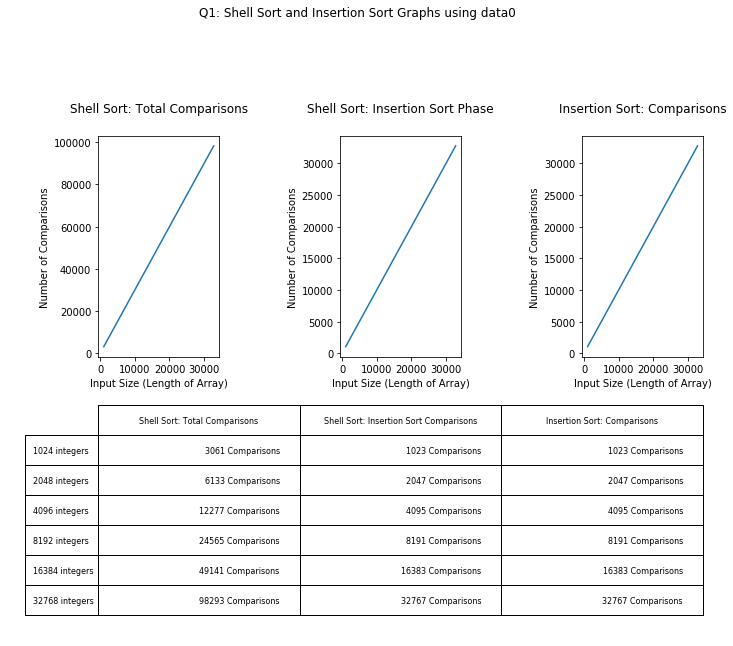

In [2]:
shellsort_comps(0)

What we see is that, in the best case, insertion sort will perform exactly N-1 comparisons for arrays of length N. Meanwhile, the Shell Sort implementation performs 3N-3 comparisons with the insertion sort phase performing N-1 of those comparisons.

This result makes sense based on what we know about insertion and shell sort:
1. Shell sort consists of multiple phases of g-sorting where the g-sort is implemented with a smaller insertion sort
2. When g-sorting we stride over the array with the smaller insertion sorts so every element gets g-sorted
3. With 3 phases of this we end up with 3 times the number of comparisons used in a single insertion sort in the best case

### data1

Now we look at the results from the data1 dataset. Here the values are unordered/shuffled. These results will give us an idea of the **average case** results and also a numerical example of why shell sorting improves upon regular insertion sorting.

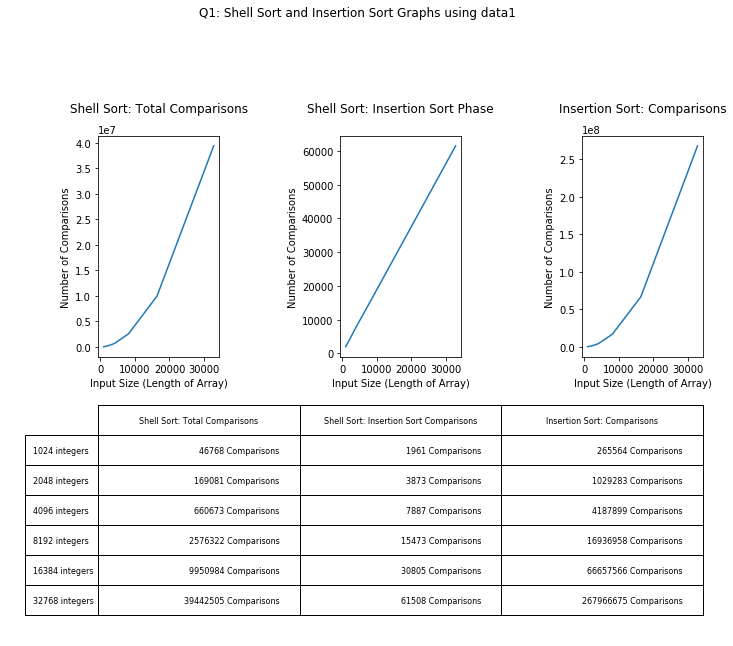

In [3]:
shellsort_comps(1)

From the results above we see that in total, shell sort will use an order of magnitude less comparisons than insertion sort (in the 32k case we have ~40 million comparisons vs ~200 million comparisons)

In addition, we can see that effects of the 7 and 3 sorting phases have on the insertion sort phase: By first 7-sorting and 3-sorting, the insertion sort phase becomes a linear complexity operation!

## Why is shell sort more effective than insertion sort in this case?

Shell sort uses a gap comparing elements far apart and then shortens the gap until reaching the case of a gap of 0 which becomes regular insertion sorting.

Shell sort therefore becomes more effective than insertion sort in cases where the array is not already sorted. It does this by reducing the number of inversion pairs after each subsorting iteration. 

### Why does this improve anything?

1. Insertion sort is on average O(n^2) which is very slow for large arrays
    1. The subsorts use insertion sort so they are also very slow for large arrays
        1. However, with the gap the size of the subarrays are not large! By using a lot of smaller insertion sorts we can reduce the number of inversion pairs efficiently!
        2. k*(N/k)^2 < N^2  for all N
            1. k is the gap size, ~k*(N/k)^2 being the cost of k sorting an array 
        
        
2. Insertion sort takes longer based on the number of inversion pairs
   1. The less inversion pairs the closer to best case performance
       1. Best case performance can be seen from data1 plots where there are 0 inversion pairs
    
### In conclusion

Shell sort is more effective than insertion sort in cases where the array is randomly shuffled because the subsorting phases allow us to reduce the number of inversion pairs through avoiding performing O(N^2) operations on large N arrays.

# Question 2
The Kendall Tau distance is a variant of the "number of inversions" we discussed in class. It is defined as the number of pairs that are in different order in two permutations. Write an efficient program that computes the Kendall Tau distance in less than quadratic time on average. Plot your results and discuss. Use the dataset provided here. 

Note: data0.* for convenience is an ordered set of numbers (in powers of two). data1.* are shuffled data sets of sizes (as given by "*").


## Implementation Details

I implemented a version of the algorithm in quadratic time and in less than quadratic time. I used a modified bubble sort algorithm that returns the total number of swaps used for sorting as the algorithm in quadratic time. I used a merge sort that returns the number of swaps used for the algorithm in less than quadratic time.

## Analysis

We are going to compare the two implementations I considered and analyze their outputs and their runtimes on the two provided datasets.

### Output analysis: data0

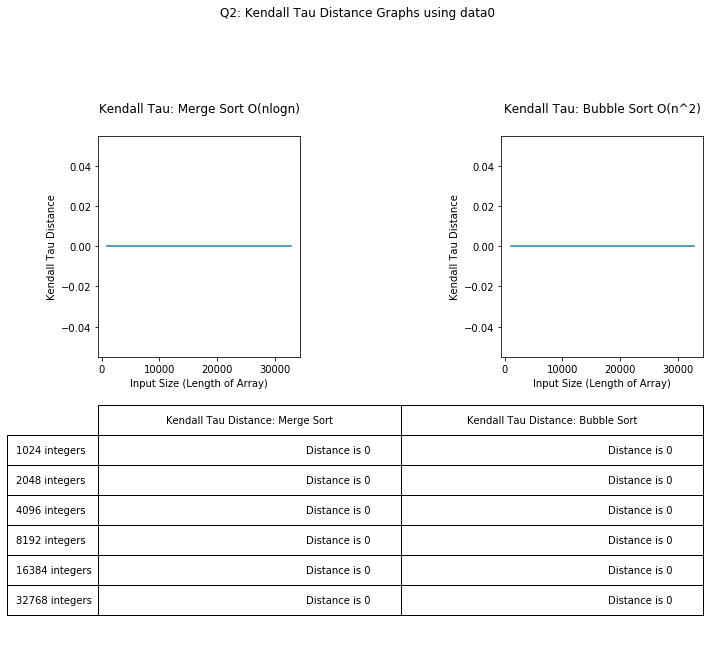

In [4]:
kendalltau_outputs(0)

Unsurprisingly, the Kendall Tau distance for sorted data is 0. This graph is essentially here as a sanity check.

### Output analysis: data1

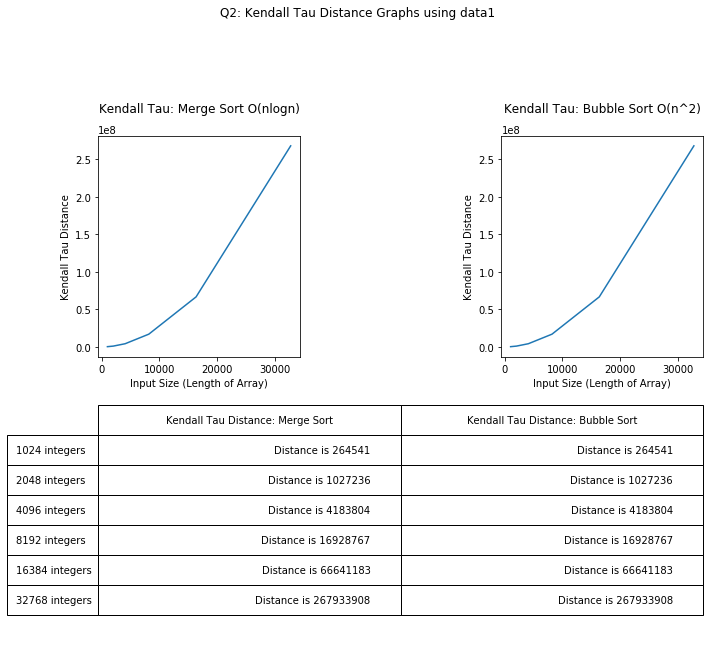

In [5]:
kendalltau_outputs(1)

In [6]:
import math
# Doubling hypothesis/Power law
run_time = [1027236, 4183804, 16928767, 66641183, 267933908]
for prev, curr in zip(run_time[:-1:], run_time[1::]):
    print(math.log(curr/prev, 2))

2.02604759834439
2.0165897270555218
1.9769371124024886
2.0073912545253996


This is the more interesting graph, showing us the Kendall Tau distance for data that is unordered/shuffled. 

1. We see that both implementations provide the same distances which is nice because that is what was intended
2. We see that the distance grows quadratically for unordered data this is significant because:
    1. It shows that the data provided is shuffled, meaning our **average case** claims in the other sections are valid
    2. It makes intuitive sense with Kendall Tau being "the number of swaps used in bubble sorting" that the number of swaps would grow at the same rate average case bubble sort grows O(n^2)

### Timing analysis: data0

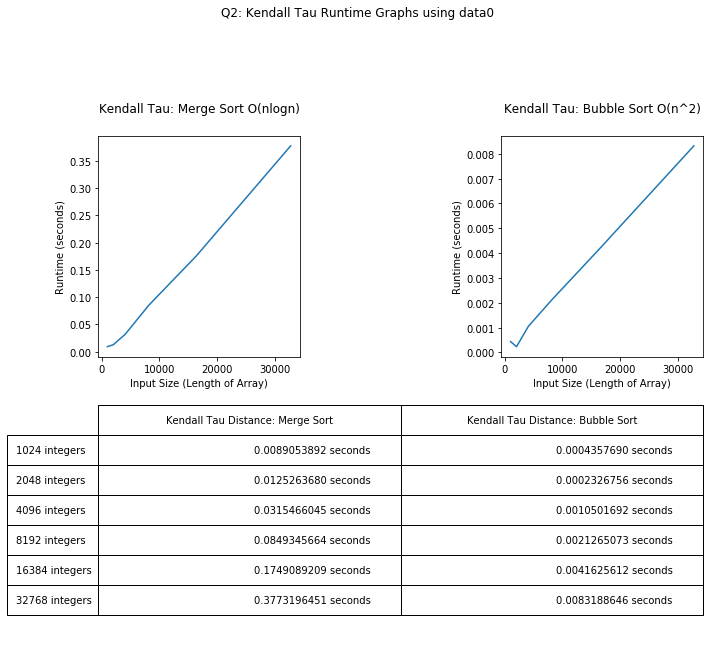

In [6]:
kendalltau_timing(0)

I discuss my bubblesort implementation later but it is necessary to know that the implementation is a modified bubblesort where if there an outer loop iteration where no swaps are made, then the sort is considered complete.

This is necessary information because it makes explaining the above results easier: This is Kendall Tau on sorted data which will give us an idea of the **best case** performance.

In the best case, Merge Sort still operates as an O(nlogn) operation because it does not consider the values of the array outside of merging.

In the best case, the modified Bubble Sort will take a single iteration to complete.

Therefore, it is not a surprise when the Bubble Sort version completes faster on data0. 

### Timing analysis: data1

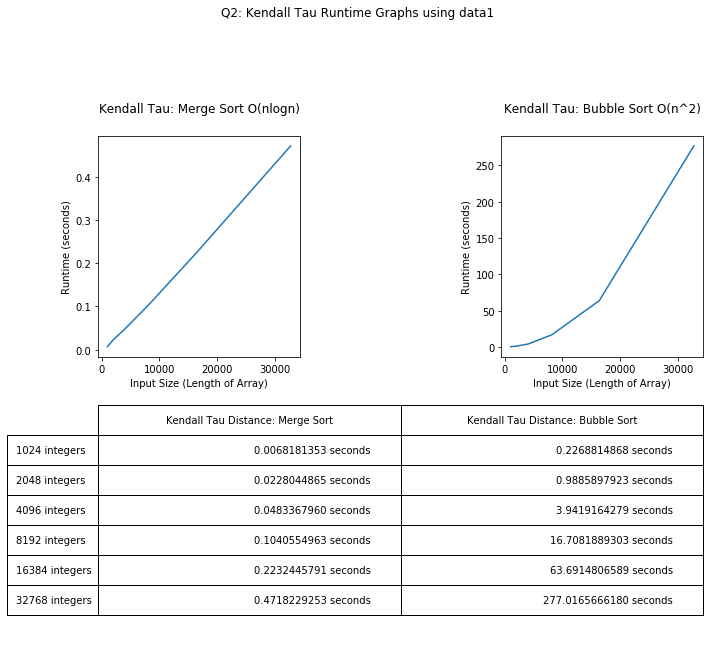

In [7]:
kendalltau_timing(1)

Here we see the power of avoiding computing Kendall Tau in quadratic time!

The merge sort implementation handles size >8000 without much issue meanwhile, the bubble sort implementation begins taking enough time to be an issue.

# Question 3

Create a data set of 8192 entries which has in the following order: 1024 repeats of 1, 2048 repeats of 11, 4096 repeats of 111 and 1024 repeats of 1111. Write a sort algorithm that you think will sort this set "most" effectively. Explain why you think so.

## Most Effective Sort Discussion

For this problem, two sorting algorithms came to mind: insertion sort and modified bubble sort.

At this point I had already implemented an insertion sort so I figured I would implement a modified bubble sort instead, however, both should perform be able to deal with sorting in O(N) time.

### Why O(N)?

If we look at the described data set we have: 1024 1's, 2048 11's, 4096 111's and 1024 1111's in that order.

This data is already in sorted order.

Therefore, to most effectively sort the data we need a sorting algorithm that improves based on how sorted the data already is.

Insertion sort we have seen to perform best case O(N) when operating on sorted data but there is also **modified bubble sort**

### Modified bubble sort

Like insertion sort, bubble sort is an O(N^2) sorting algorithm. With the addition of a way of checking if any of the outer loop iterations of bubble sort performs 0 swaps and then breaking if that is the case, we are able to improve the performance of bubble sort. This improvement allows us to achieve **best case** O(N) performance on already sorted arrays, which is exactly what we want for this problem.

### Why not just use insertion sort

1. I needed a bubblesort implementation for the Kendall Tau experimentation I wanted to do
2. It's easy to implement so I figured why not brush up on it

### Implementation

I recreated the Q3.py main functioln below to show how I create the dataset and the output when bubblesort tries to sort the data. This should follow the no code in report rule because no algorithm implementation is here.

I have bubblesort sort inplace and return the number of comparisons and the number of swaps used to sort.

### What if the array was shuffled?

If the array was shuffled then we would be best off using a sort that improves as the set of different, repeated elements in the array decreases. One of these such sorts is the **Bucket sort**.

The Bucket sort is an algorithm that creates different subarrays containing values within a specified range and then sorts the different subarrays. If we implemented a bucket sort that seperated 1, 11, 111 and 1111 then the bucket sort would require a single pass to create the buckets, a single pass to "sort" the buckets and then a single pass to combine the buckets. This would mean that even after shuffling, this array could be sorted in O(n) time.

**I did not include this algorithm for Q3**

In [9]:
from Q3.Q3 import bubblesort as Q3_sort

num_comps, num_swaps = Q3_sort(1024 * [1] + 2048 * [11] + 4096 * [111] + 1024 * [1111])
print("Bubblesort makes {} comparisons, {} swaps to sort the specified dataset".format(num_comps, num_swaps))

Bubblesort makes 8191 comparisons, 0 swaps to sort the specified dataset


# Question 4

Implement the two versions of MergeSort that we discussed in class. Create a table or a plot for the total number of comparisons to sort the data (using data set here) for both cases. Explain.

## Analysis

### Comparisons: data0

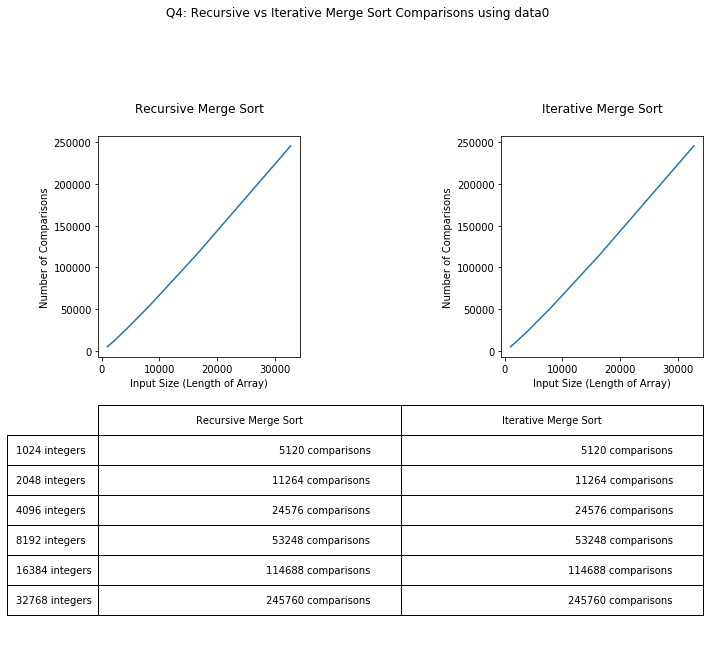

In [8]:
mergesort_vs_mergesort(0)

The recursive and iterative merge sorts make the same exact merge calls but the recursive merge sort calls them top-down while the iterative merge sort calls them bottom-up. The calls are still executed in the same order so the number of comparisons are identical.

With already sorted data, the merge sorts use less comparisons to merge the data but still are O(nlogn).

### Comparisons: data1

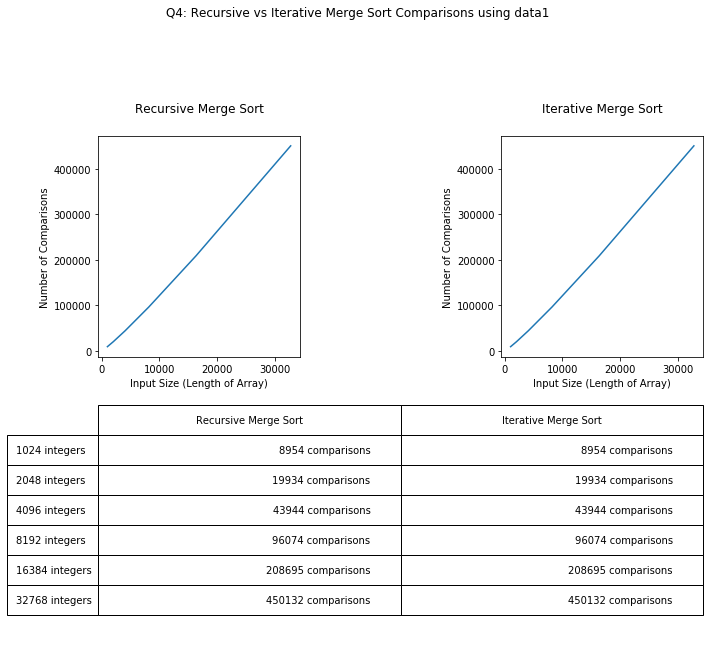

In [9]:
mergesort_vs_mergesort(1)

When operating on unsorted data, the merge calls require additional comparisons that the unsorted version does not need. We therefore see that the number of comparisons for data1 are strictly greater than the corresponding number of comparisons for data0.

# Question 5

Implement Quicksort using median-of-three to determine the partition element. Compare the performance of Quicksort with the Mergesort implementation and dataset from Q4. Is there any noticeable difference when you use N=7 as the cut-off to insertion sort. Experiment if there is any value of "cut-off to insertion" at which the performance inverts.

## Topic 1: Merge Sort vs Quick Sort

We are going to first compare the runtime performance for merge sort and quick sort on the two provided datasets.

I have made a single modification: I added an additional data point consisting of a larger input array. This larger input array is appropriately sorted/shuffled for data0 and data1.

### data0

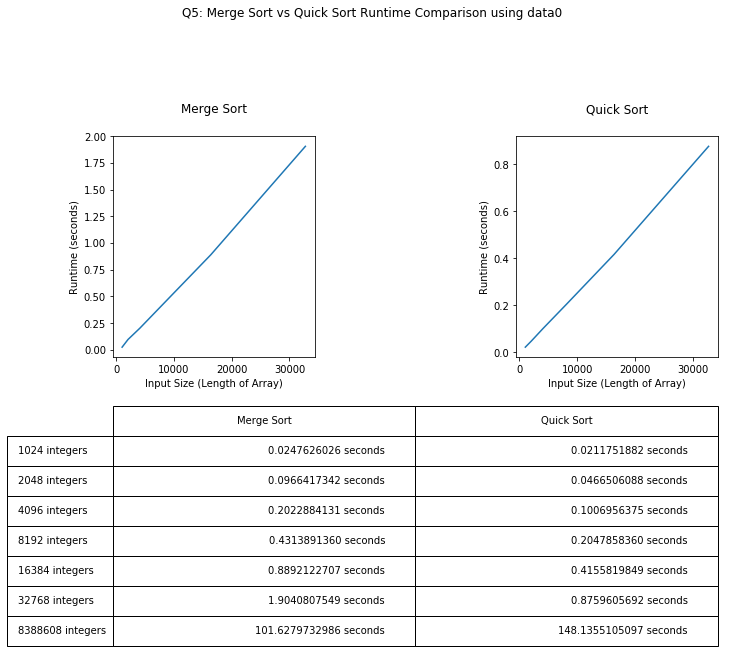

In [2]:
quicksort_vs_mergesort(0)

For data0 we see that quick sort outperforms merge sort on sizes up to 32k. I was not satisfied with this answer because I felt like there must be a trade-off somewhere and that quick sort would not always outperform merge sort. This suspicion led me to add the extra data point, where we see that on increasingly large datasets, merge sort begins to outperform quick sort.

### data1

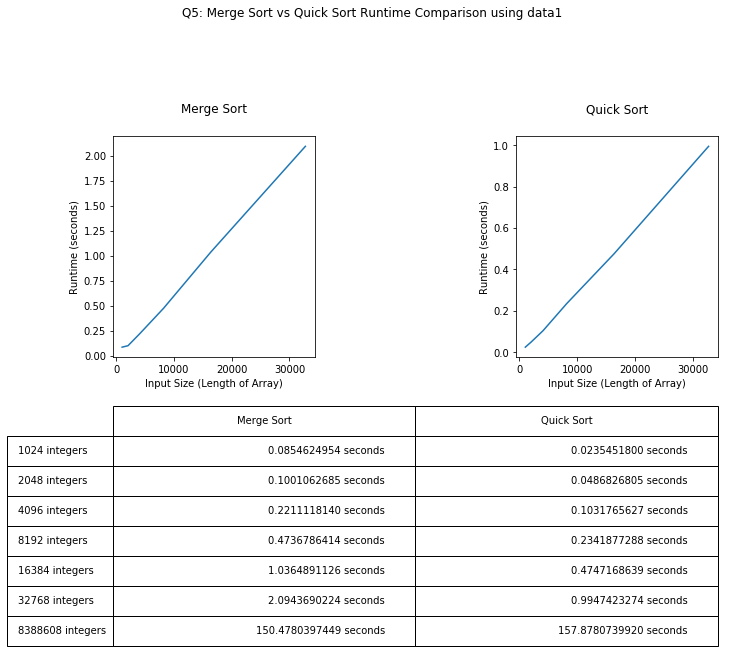

In [11]:
quicksort_vs_mergesort(1)

We see the same general trend in data1. We know that the two algorithms **best** and **average** case performances are similar which we see again here. However, there is an interesting result here. We know that while merge sort has the same **best** and **average** case performances, the helper function merge does not have the same performances.

Merge calls complete faster when the data is already sorted. I believe this leads us to the result of merge sort taking almost 50% longer to sort the 8M integer array when it is not sorted.

## Topic 2: Merge Sort vs Quick Sort with Insertion Sort Cutoff

Now we investigate quick-insertion and merge-insertion sort hybrid algorithms. The intuition here is that because insertion sort performs better on smaller datasets when compared to merge and quick sort, we are better off switching to insertion sort when the array sizes are smaller.

### data0

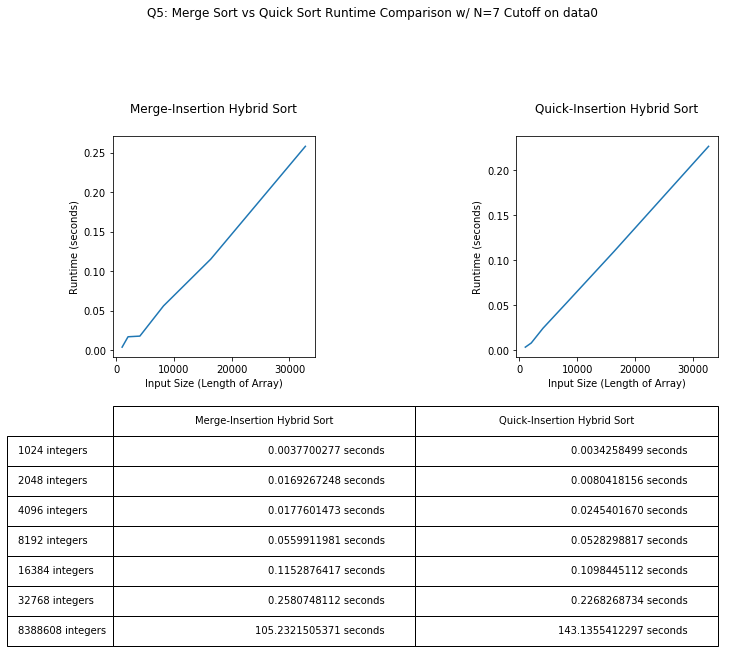

In [3]:
quicksort_vs_mergesort_cutoffs(0)

On the already sorted data we see a pretty signficant speed up compared to the original algorithms with some exceptions (smallest and largest datasets).

### data1

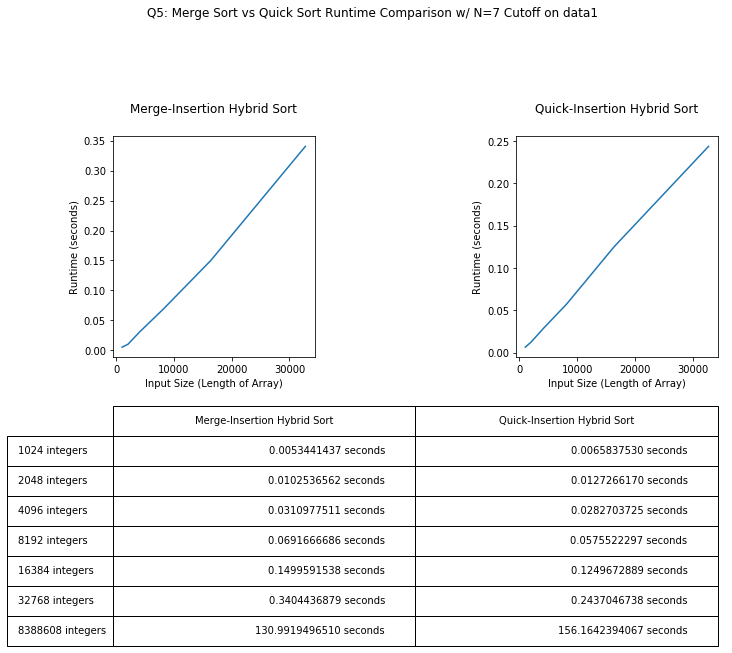

In [4]:
quicksort_vs_mergesort_cutoffs(1)

Once again we see a pretty signficant speed up compared to the original algorithms, this time on data that isn't sorted.

## Topic 3: Experimenting with the Cutoff

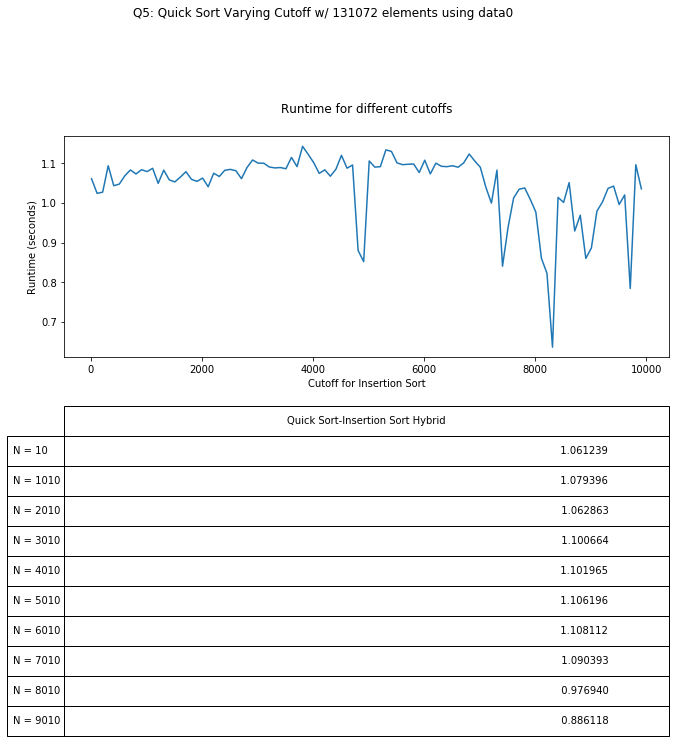

In [2]:
quicksort_varying_cutoffs(0)

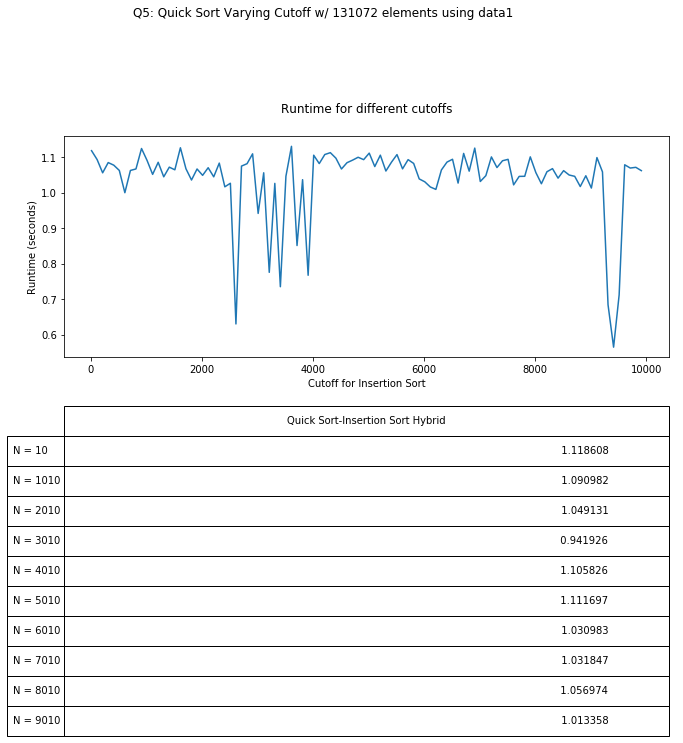

In [3]:
quicksort_varying_cutoffs(1)

My experiments with the cutoff were inconclusive. 

I kept the dataset size constant at 131,072 elements (properly sorted/shuffled) and varied the cutoff value from 10 to 9010 in increments of 100. What I found was that there was no clear performance inversion point. Further experimentation would be to increase the range of cutoff values, increase the input array size and to increase the number of trials for each combination.